In [1]:
#import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#looad the dataset
df=pd.read_csv("/home/vishwas/EmployeeAttrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
#checking for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df['Education']=df['Education'].map({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})
df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].map({1:'Low',2:'Medium',3:'High',4:'Very High'})
df['JobInvolvement']=df['JobInvolvement'].map({1:'Low',2:'Medium',3:'High',4:'Very High'})
   


# Exploratory Data Analysis

Sales
Research & Development
Human Resources


<BarContainer object of 3 artists>

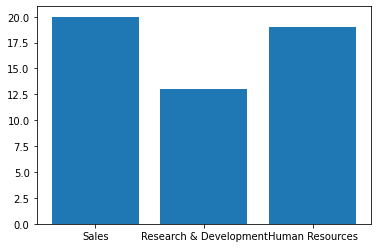

In [7]:
#no of employees who left from a particualar department
d={}
l=df['Department'].unique()
for i in l:
    print(i)
    c=df['Department'][df['Department']==i][df['Attrition']=='Yes'].shape[0]/df['Department'][df['Department']==i].shape[0]
    d[i]=int(c*100)
plt.bar(d.keys(),d.values())


# Most of the employees who left belonged to sales

Sales Executive
Research Scientist
Laboratory Technician
Manufacturing Director
Healthcare Representative
Manager
Sales Representative
Research Director
Human Resources
Laboratory Technician        62
Sales Executive              57
Research Scientist           47
Sales Representative         33
Human Resources              12
Manufacturing Director       10
Healthcare Representative     9
Manager                       5
Research Director             2
Name: JobRole, dtype: int64


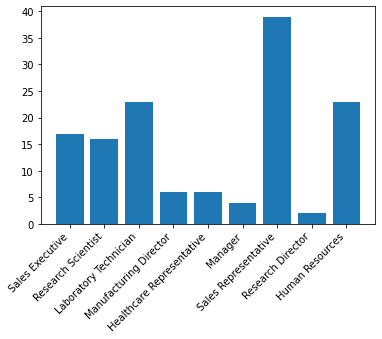

In [8]:
d={}
l=df['JobRole'].unique()
for i in l:
    print(i)
    c=df['JobRole'][df['JobRole']==i][df['Attrition']=='Yes'].shape[0]/df['JobRole'][df['JobRole']==i].shape[0]
    d[i]=int(c*100)
plt.bar(d.keys(),d.values())
plt.xticks(rotation=45,horizontalalignment='right')
jobrole=df['JobRole'][df['Attrition']=='Yes'].value_counts()
print(jobrole)

# Most of the employees who left were sales representatives


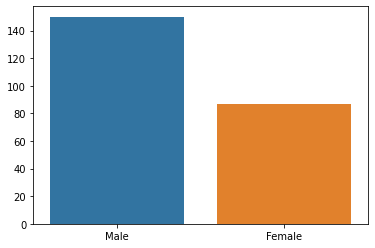

In [9]:
gender=df['Gender'][df['Attrition']=='Yes'].value_counts()
sns.barplot(x=gender.index,y=gender.values)

# most of the employees who left are .

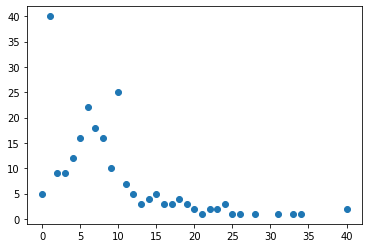

In [10]:
#Dependecy of attrition of total working years
years=df['TotalWorkingYears'][df['Attrition']=='Yes'].value_counts()
plt.scatter(x=years.index,y=years.values)

# if the employeee stays in company for more than 5 years there is less chance that he'll leave the company.

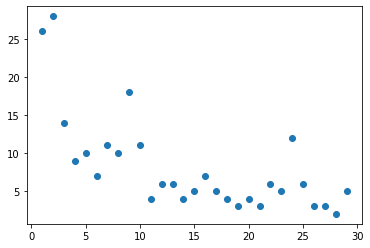

In [11]:
#Dependecy of attrition of total working years
years=df['DistanceFromHome'][df['Attrition']=='Yes'].value_counts()
plt.scatter(x=years.index,y=years.values)

Single
Married
Divorced


([0, 1, 2], <a list of 3 Text major ticklabel objects>)

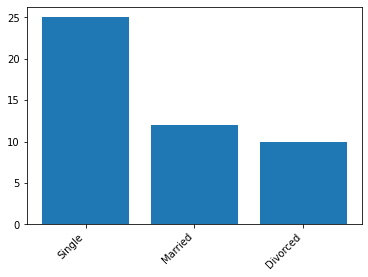

In [12]:
d={}
l=df['MaritalStatus'].unique()
for i in l:
    print(i)
    c=df['MaritalStatus'][df['MaritalStatus']==i][df['Attrition']=='Yes'].shape[0]/df['MaritalStatus'][df['MaritalStatus']==i].shape[0]
    d[i]=int(c*100)
plt.bar(d.keys(),d.values())
plt.xticks(rotation=45,horizontalalignment='right')


# Most of the employees who left are single

In [13]:
# #Dependecy of attrition of total working years
# years=df['MonthlyIncome'][df['Attrition']=='Yes'].value_counts()
# print(years)
# plt.scatter(x=years.index,y=years.values)

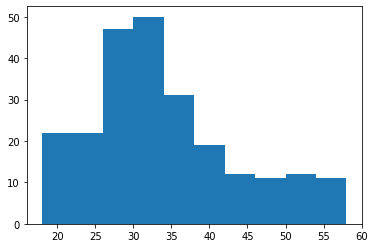

In [14]:
plt.hist(df['Age'][df['Attrition']=='Yes'])
plt.show()

# Most of the employees who left belonged to age group to 30-35.

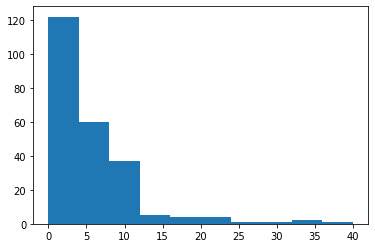

In [15]:
plt.hist(df['YearsAtCompany'][df['Attrition']=='Yes'])
plt.show()

# Most of the employees who left worked in the company for less than 5 years

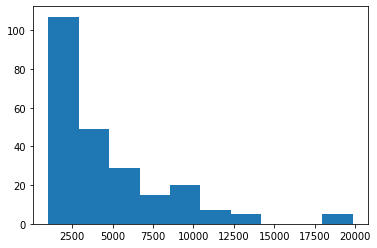

In [16]:
plt.hist(df['MonthlyIncome'][df['Attrition']=='Yes'])
plt.show()

# Most of the employees who left had salary less than 2500

High
{'High': 14.400921658986174}
Medium
{'High': 14.400921658986174, 'Medium': 18.933333333333334}
Very High
{'High': 14.400921658986174, 'Medium': 18.933333333333334, 'Very High': 9.027777777777777}
Low
{'High': 14.400921658986174, 'Medium': 18.933333333333334, 'Very High': 9.027777777777777, 'Low': 33.734939759036145}
76.09697252913344


([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

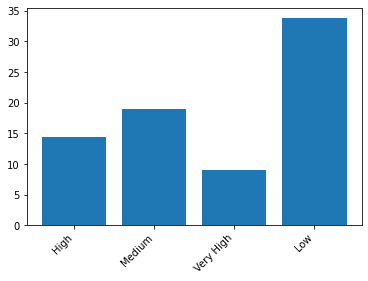

In [17]:
d={}
l=df['JobInvolvement'].unique()
for i in l:
    print(i)
    c=df['JobInvolvement'][df['JobInvolvement']==i][df['Attrition']=='Yes'].shape[0]/df['JobInvolvement'][df['JobInvolvement']==i].shape[0]
    d[i]=(c*100)
    print(d)
plt.bar(d.keys(),d.values())
print(sum(d.values()))
plt.xticks(rotation=45,horizontalalignment='right')
# count=df['JobInvolvement'][df['Attrition']=='Yes'].value_counts()
# sns.barplot(x=count.index,y=count.values)

# Most of the employees who left was less involved in the job

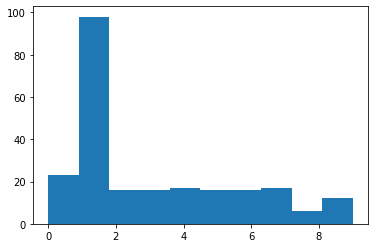

In [18]:
plt.hist(df['NumCompaniesWorked'][df['Attrition']=='Yes'])
plt.show()

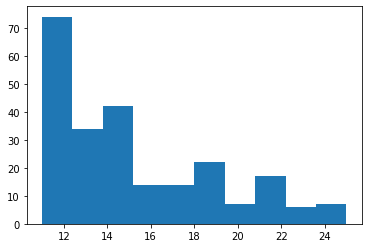

In [19]:
plt.hist(df['PercentSalaryHike'][df['Attrition']=='Yes'])
plt.show()

# most of the employees who left had less salary hike

In [20]:
# plt.hist(df['YearsWithCurrManager'][df['Attrition']=='Yes'])
# plt.show()

In [21]:
# count=df['YearsSinceLastPromotion'][df['Attrition']=='Yes'].value_counts()
# sns.barplot(x=count.index,y=count.values)
# plt.hist(df['YearsSinceLastPromotion'][df['Attrition']=='Yes'])
# plt.show()

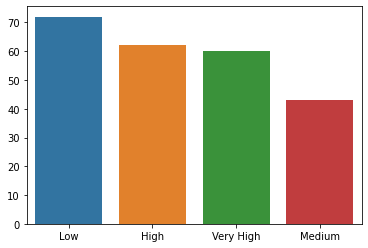

In [22]:

count=df['EnvironmentSatisfaction'][df['Attrition']=='Yes'].value_counts()
sns.barplot(x=count.index,y=count.values)

# most of the employees who left were not satistified with environment condition.


Travel_Rarely
Travel_Frequently
Non-Travel
47.86660251773037


([0, 1, 2], <a list of 3 Text major ticklabel objects>)

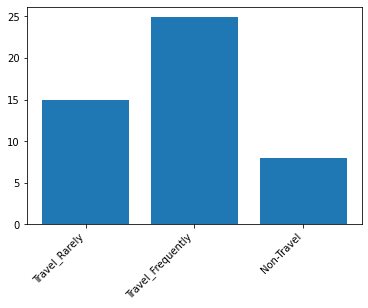

In [23]:
d={}
l=df['BusinessTravel'].unique()
for i in l:
    print(i)
    c=df['BusinessTravel'][df['BusinessTravel']==i][df['Attrition']=='Yes'].shape[0]/df['BusinessTravel'][df['BusinessTravel']==i].shape[0]
    d[i]=(c*100)
plt.bar(d.keys(),d.values())
print(sum(d.values()))
plt.xticks(rotation=45,horizontalalignment='right')

# most of the employees who left travelled frequently

In [24]:
# count=df['JobLevel'][df['Attrition']=='Yes'].value_counts()
# sns.barplot(x=count.index,y=count.values)

In [25]:
# count=df['OverTime'][df['Attrition']=='Yes'].value_counts()
# sns.barplot(x=count.index,y=count.values)

Yes
No
40.96527879141732


([0, 1], <a list of 2 Text major ticklabel objects>)

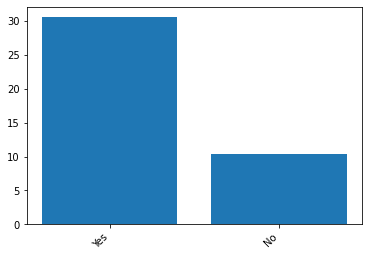

In [26]:
d={}
l=df['OverTime'].unique()
for i in l:
    print(i)
    c=df['OverTime'][df['OverTime']==i][df['Attrition']=='Yes'].shape[0]/df['OverTime'][df['OverTime']==i].shape[0]
    d[i]=(c*100)
plt.bar(d.keys(),d.values())
print(sum(d.values()))
plt.xticks(rotation=45,horizontalalignment='right')


# Most of the employees who left worked overtime.

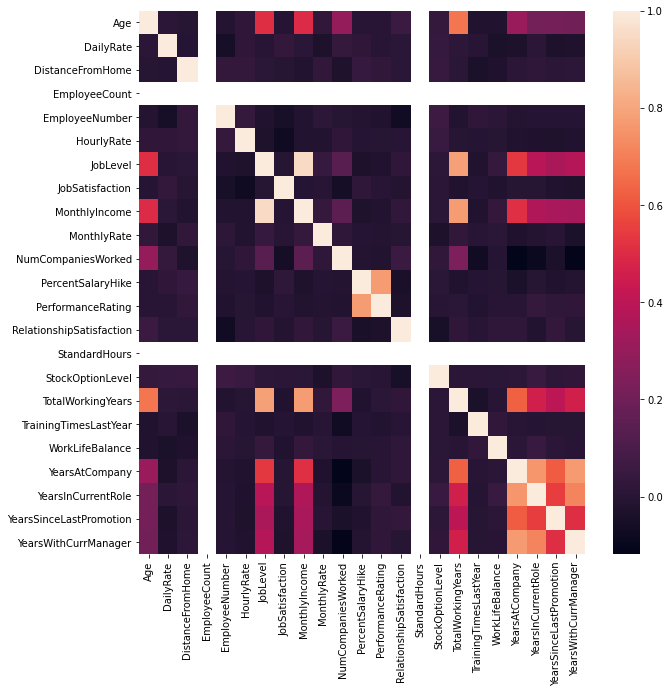

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())


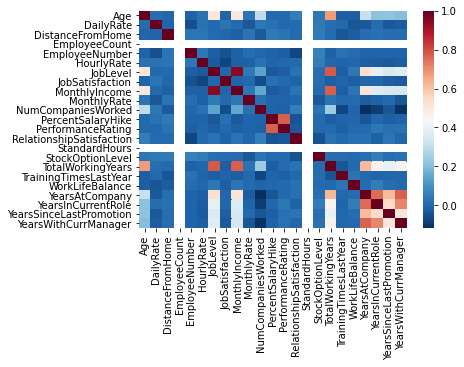

In [28]:
pearsoncorr=df.corr(method="pearson")
sns.heatmap(pearsoncorr,xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,cmap='RdBu_r')

In [29]:
categorical_columns=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime',
                     'Over18','Education','EnvironmentSatisfaction','JobInvolvement']
numerical_cols = []
for col in df.columns:
    if col not in categorical_columns:
        numerical_cols.append(col)
                


# Label Encoding for Categorical Columns

In [30]:
from sklearn.preprocessing import LabelEncoder
def encode(s):
    for i in s:
        string=i+"encoded"
        column=i
        df[string]=LabelEncoder().fit_transform(df[i])

encode(categorical_columns)
df
df.drop(['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','Over18','Education','EnvironmentSatisfaction','JobInvolvement'],axis=1,inplace=True)

# Splitting the dataset into training and testing data

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop('Attritionencoded',axis=1)
y = df['Attritionencoded']
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size= 0.70, random_state=0);


In [32]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
def train_data(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    predicted_values=model.predict(X_test)
    print("Confusion Matrix\n",confusion_matrix(y_test,predicted_values))
    print("Acuuracy Score\n",accuracy_score(y_test,predicted_values))
    print("Classification Report\n",classification_report(y_test,predicted_values))
   
    
    

# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
train_data(decision_tree,X_train,X_test,y_train,y_test)


Confusion Matrix
 [[318  53]
 [ 49  21]]
Acuuracy Score
 0.7687074829931972
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       371
           1       0.28      0.30      0.29        70

    accuracy                           0.77       441
   macro avg       0.58      0.58      0.58       441
weighted avg       0.77      0.77      0.77       441



# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier()
train_data(r,X_train,X_test,y_train,y_test)

Confusion Matrix
 [[368   3]
 [ 58  12]]
Acuuracy Score
 0.8616780045351474
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       371
           1       0.80      0.17      0.28        70

    accuracy                           0.86       441
   macro avg       0.83      0.58      0.60       441
weighted avg       0.85      0.86      0.82       441



Text(0.5, 0, 'Relative Importance')

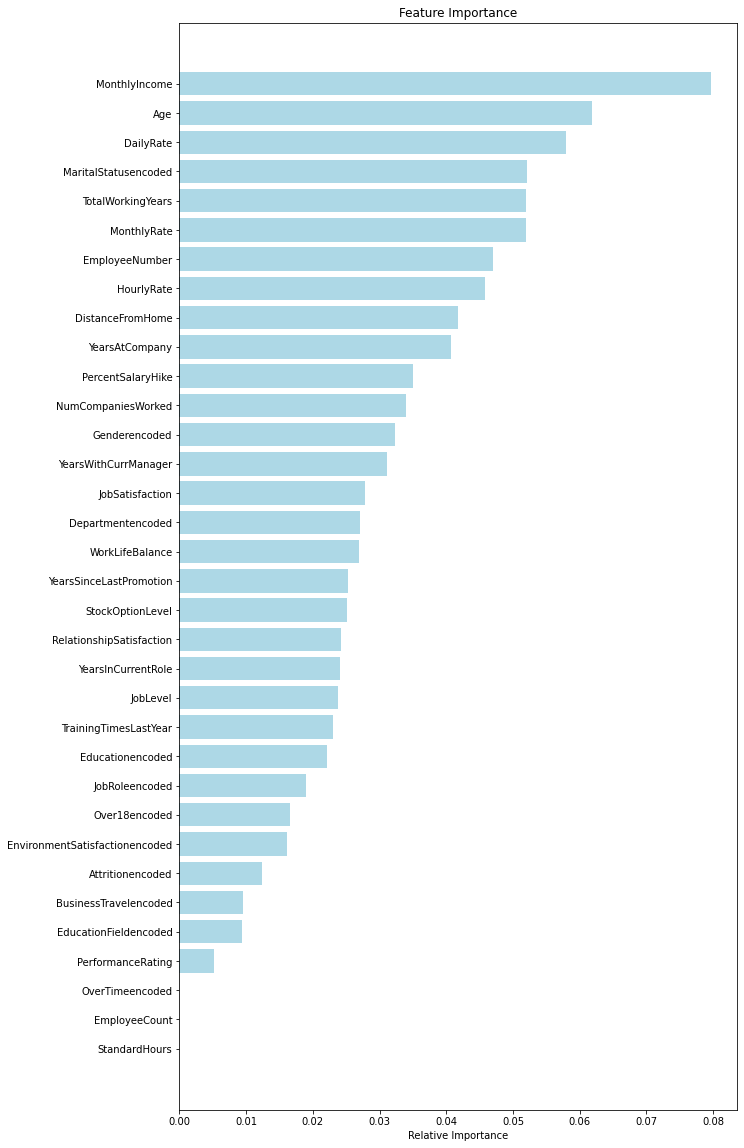

In [35]:
features = df.columns
feature_importance = r.feature_importances_
indices = np.argsort(feature_importance)
plt.figure(1,figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), feature_importance[indices], color='lightblue', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [36]:
#From the graph its clear that attrition mostly depends on monthly income,age,daily rate.

# KNeighBours Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
k= KNeighborsClassifier(n_neighbors=1)
train_data(k,X_train,X_test,y_train,y_test)

Confusion Matrix
 [[320  51]
 [ 50  20]]
Acuuracy Score
 0.7709750566893424
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       371
           1       0.28      0.29      0.28        70

    accuracy                           0.77       441
   macro avg       0.57      0.57      0.57       441
weighted avg       0.77      0.77      0.77       441



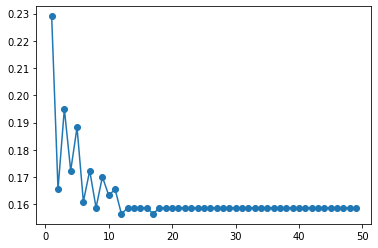

In [38]:
#Calculating error rate to find the optimum k value.
error = []
l=[]
for i in range(1,50):
    l.append(i)
    k = KNeighborsClassifier(n_neighbors=i)
    k.fit(X_train,y_train)
    predicted = k.predict(X_test)
    error.append(np.mean(predicted != y_test))
min_error_rate=min(error)
min_value=1+error.index(min(error))

plt.plot(l,error,marker='o')


In [39]:
print("Minimum eror rate is" ,min_error_rate)
print("Optimum value of k",min_value)


Minimum eror rate is 0.1564625850340136
Optimum value of k 12


In [40]:
k1=KNeighborsClassifier(n_neighbors=min_value)
train_data(k1,X_train,X_test,y_train,y_test)

Confusion Matrix
 [[370   1]
 [ 68   2]]
Acuuracy Score
 0.8435374149659864
Classification Report
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.67      0.03      0.05        70

    accuracy                           0.84       441
   macro avg       0.76      0.51      0.48       441
weighted avg       0.82      0.84      0.78       441



# SVC

In [41]:
from sklearn.svm import SVC
svc_model = SVC()
train_data(svc_model,X_train,X_test,y_train,y_test)

Confusion Matrix
 [[371   0]
 [ 70   0]]
Acuuracy Score
 0.8412698412698413
Classification Report
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441



/home/vishwas/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Highest accuracy is obtained using Random Forest and KNeighbours.
Random Forest-85.94% 

KNeighbours-84.35%

